In [100]:
import glob
import pickle
import matplotlib.pylab as plt
import seaborn as sns
import os.path as op
import pandas as pd
import numpy as np
from itertools import compress
from scipy import stats
from mne.stats import permutation_cluster_test

%matplotlib inline
%config InlineBackend.figure_format = 'png'

pd.set_option("mode.chained_assignment", None)

In [130]:
def items_cont_str(input_list, string, sort=False):
    """
    returns a list of items which contain a given string
    optionally sorted
    """
    output_list = [string in i for i in input_list]
    output_list = list(compress(input_list, output_list))
    if sort:
        output_list.sort()
    return output_list


def find_edge(time, slice_obj):
    s = np.min(time[slice_obj])
    e = np.max(time[slice_obj])
    return [s, e]

In [3]:
path_data = "/home/maciek/git/stirring_beh_analysis/data/"
path_figs = "/home/maciek/Dropbox/stirring_figures/"

bin_cond = {0: ((0, 5), 'no change of coherence and direction'),
            1: ((1, 4), 'change of direction only'),
            2: ((2, 7), 'change of coherence but no direction'),
            3: ((3, 6), 'change of both coherence and direction')
            }

labels = [
    "no change of coherence \nand direction", 
    "change of \ndirection only", 
    "change of coherence \nbut no direction", 
    "change of both \ncoherence and direction"

]
f_types = [
    "arrow_training",
    "stir_training_50",
    "stir_training_main",
    "stir_main_LAB",
    "stir_main_MEG"
]

time = np.linspace(0.0, 4.0, num=1000)

blink_ix = (487, 512)

In [ ]:
glob_path = op.join(path_data, "**", "*.pkl")
all_pkl = [i for i in glob.iglob(glob_path, recursive=True)]
results = items_cont_str(all_pkl, "_all_data.pkl", sort=True)

In [ ]:
cond_stacks = {i: [] for i in bin_cond.keys()}

for pp in results:
    data_in = pd.read_pickle(pp)
    for i in bin_cond.keys():
#         cond = data_in.loc[(data_in.binned_cond == i) & ((data_in.exp_type == "stir_main") | (data_in.exp_type == f_types[3]))].degs
        cond = data_in.loc[(data_in.binned_cond == i) & (data_in.exp_type == "stir_training_main")].degs
        cond = np.vstack(list(cond))
        cond = np.abs(cond)
#         cond = np.mean(cond, axis=0)
        cond_stacks[i].append(cond)
cond_stacks = {i: np.vstack(cond_stacks[i]) for i in cond_stacks.keys()}

# filename = op.join(path_data, "stir_main")
# outfile = open(filename,'wb')
# pickle.dump(cond_stacks, outfile)
# outfile.close()

In [93]:
pickle_list_all = ["stir_main_means", "stir_training_main_means", "stir_main", "stir_training_main"]
pickle_list = ["stir_main_means", "stir_training_main_means"]
# pickle_list = ["stir_main", "stir_training_main"]

data_traj = dict()
for pkl in pickle_list_all:
    pkl_path = op.join(path_data, pkl)
    infile = open(pkl_path,'rb')
    dump = pickle.load(infile)
    infile.close()
    data_traj[pkl] = dump

In [129]:
results_stats = dict()

In [131]:
# permutation for stir_main
pick = pickle_list_all[2]

# no change
conditions = [0,2]
X = [data_traj[pick][conditions[0]], data_traj[pick][conditions[1]]]
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(X, threshold=6.0, n_permutations=1000, tail=0, n_jobs=-1, verbose=True)
significant = list(compress(clusters, cluster_p_values < 0.01))
cluster_bounds0 = [find_edge(time, i) for i in significant]

# change
conditions = [1,3]
X = [data_traj[pick][conditions[0]], data_traj[pick][conditions[1]]]
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(X, threshold=6.0, n_permutations=1000, tail=0, n_jobs=-1, verbose=True)
significant = list(compress(clusters, cluster_p_values < 0.01))
cluster_bounds1 = [find_edge(time, i) for i in significant]

results_stats[pick] = [cluster_bounds0, cluster_bounds1]

stat_fun(H1): min=0.000000 max=42.892917
Running initial clustering
Found 8 clusters
Permuting 999 times...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   17.9s remaining:   17.9s


Computing cluster p-values
Done.
stat_fun(H1): min=0.000006 max=69.665920
Running initial clustering
Found 9 clusters


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   18.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   18.2s finished


Permuting 999 times...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Computing cluster p-values
Done.


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   16.9s remaining:   16.9s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   17.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   17.0s finished


In [134]:
# permutation for stir_main
pick = pickle_list_all[3]

# no change
conditions = [0,2]
X = [data_traj[pick][conditions[0]], data_traj[pick][conditions[1]]]
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(X, threshold=6.0, n_permutations=1000, tail=0, n_jobs=-1, verbose=True)
significant = list(compress(clusters, cluster_p_values < 0.01))
cluster_bounds0 = [find_edge(time, i) for i in significant]

# change
conditions = [1,3]
X = [data_traj[pick][conditions[0]], data_traj[pick][conditions[1]]]
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(X, threshold=6.0, n_permutations=1000, tail=0, n_jobs=-1, verbose=True)
significant = list(compress(clusters, cluster_p_values < 0.01))
cluster_bounds1 = [find_edge(time, i) for i in significant]

results_stats[pick] = [cluster_bounds0, cluster_bounds1]

stat_fun(H1): min=0.000001 max=66.600820
Running initial clustering
Found 10 clusters
Permuting 999 times...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   27.2s remaining:   27.2s


Computing cluster p-values
Done.
stat_fun(H1): min=0.000001 max=65.167008
Running initial clustering
Found 9 clusters


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   27.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   27.8s finished


Permuting 999 times...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   27.2s remaining:   27.2s


Computing cluster p-values
Done.


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   28.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   28.1s finished


In [135]:
results_stats["stir_training_main"]

[[[2.3863863863863863, 2.9069069069069067],
  [2.9229229229229228, 3.063063063063063],
  [3.895895895895896, 3.995995995995996]],
 [[2.4024024024024024, 2.5545545545545547],
  [2.6986986986986987, 3.203203203203203],
  [3.215215215215215, 3.4354354354354353]]]

In [94]:
mean = dict()
sem = dict()
for k in pickle_list:
    mean[k] = [np.mean(data_traj[k][i], axis=0) for i in range(4)]
    sem[k] = [stats.sem(data_traj[k][i], axis=0) for i in range(4)]

In [139]:
p = pickle_list[0]
stats_res = results_stats[p[:-6]]
print(stats_res)

[[[2.4584584584584586, 2.7627627627627627]], [[2.4184184184184185, 2.5785785785785786], [2.754754754754755, 3.135135135135135]]]


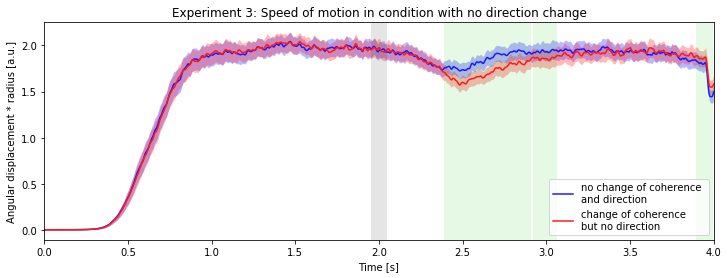

In [153]:
p = pickle_list[1]
conditions = [0,2]

stats_res = results_stats[p[:-6]]

colour1 = "#1919ff"
colour2 = "#ff1919"
sign = "#00cc00"

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)

for i in stats_res[0]:
    ax.axvspan(i[0], i[1], alpha=0.1, color=sign, linewidth=0)

ax.axvspan(time[blink_ix[0]], time[blink_ix[1]], alpha=0.1, color="black", linewidth=0)
                 
mean_val = mean[p][conditions[0]]
sem_val = sem[p][conditions[0]]
sem_low = mean_val - sem_val
sem_high = mean_val + sem_val
ax.plot(time, mean_val, color=colour1, label=labels[conditions[0]])
ax.fill_between(time, sem_low, sem_high, alpha=.3, color=colour1, linewidth=0)

mean_val = mean[p][conditions[1]]
sem_val = sem[p][conditions[1]]
sem_low = mean_val - sem_val
sem_high = mean_val + sem_val
ax.plot(time, mean_val, color=colour2, label=labels[conditions[1]])
ax.fill_between(time, sem_low, sem_high, alpha=.3, color=colour2, linewidth=0)

plt.legend(loc=4, fontsize="medium")

plt.xlabel("Time [s]")
plt.ylabel("Angular displacement * radius [a.u.]")
plt.title("Experiment 3: Speed of motion in condition with no direction change")

plt.xlim((0,4));

plt.savefig(op.join(path_figs, "exp3_tr_nch.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp3_tr_nch.svg"), bbox_inches="tight")

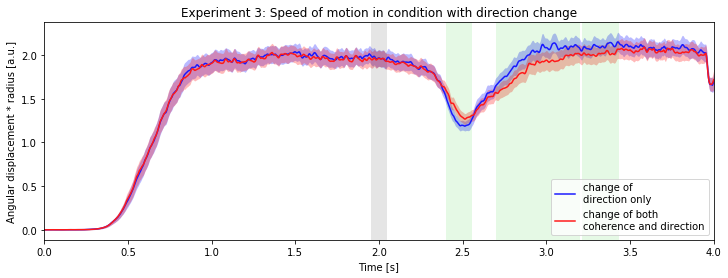

In [154]:
p = pickle_list[1]
conditions = [1,3]

stats_res = results_stats[p[:-6]]

colour1 = "#1919ff"
colour2 = "#ff1919"
sign = "#00cc00"

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)

for i in stats_res[1]:
    ax.axvspan(i[0], i[1], alpha=0.1, color=sign, linewidth=0)

ax.axvspan(time[blink_ix[0]], time[blink_ix[1]], alpha=0.1, color="black", linewidth=0)
                 
mean_val = mean[p][conditions[0]]
sem_val = sem[p][conditions[0]]
sem_low = mean_val - sem_val
sem_high = mean_val + sem_val
ax.plot(time, mean_val, color=colour1, label=labels[conditions[0]])
ax.fill_between(time, sem_low, sem_high, alpha=.3, color=colour1, linewidth=0)

mean_val = mean[p][conditions[1]]
sem_val = sem[p][conditions[1]]
sem_low = mean_val - sem_val
sem_high = mean_val + sem_val
ax.plot(time, mean_val, color=colour2, label=labels[conditions[1]])
ax.fill_between(time, sem_low, sem_high, alpha=.3, color=colour2, linewidth=0)

plt.legend(loc=4, fontsize="medium")

plt.xlabel("Time [s]")
plt.ylabel("Angular displacement * radius [a.u.]")
plt.title("Experiment 3: Speed of motion in condition with direction change")

plt.xlim((0,4));

plt.savefig(op.join(path_figs, "exp3_tr_ch.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp3_tr_ch.svg"), bbox_inches="tight")

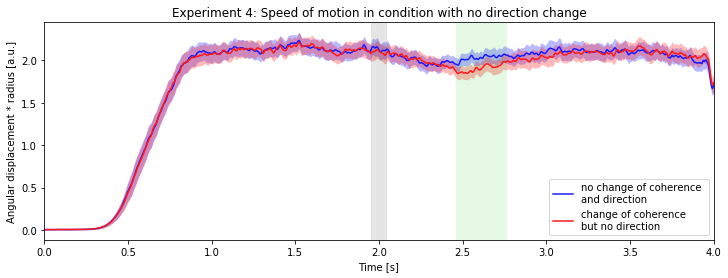

In [155]:
p = pickle_list[0]
conditions = [0,2]

stats_res = results_stats[p[:-6]]

colour1 = "#1919ff"
colour2 = "#ff1919"
sign = "#00cc00"

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)

for i in stats_res[0]:
    ax.axvspan(i[0], i[1], alpha=0.1, color=sign, linewidth=0)

ax.axvspan(time[blink_ix[0]], time[blink_ix[1]], alpha=0.1, color="black", linewidth=0)
                 
mean_val = mean[p][conditions[0]]
sem_val = sem[p][conditions[0]]
sem_low = mean_val - sem_val
sem_high = mean_val + sem_val
ax.plot(time, mean_val, color=colour1, label=labels[conditions[0]])
ax.fill_between(time, sem_low, sem_high, alpha=.3, color=colour1, linewidth=0)

mean_val = mean[p][conditions[1]]
sem_val = sem[p][conditions[1]]
sem_low = mean_val - sem_val
sem_high = mean_val + sem_val
ax.plot(time, mean_val, color=colour2, label=labels[conditions[1]])
ax.fill_between(time, sem_low, sem_high, alpha=.3, color=colour2, linewidth=0)

plt.legend(loc=4, fontsize="medium")

plt.xlabel("Time [s]")
plt.ylabel("Angular displacement * radius [a.u.]")
plt.title("Experiment 4: Speed of motion in condition with no direction change")

plt.xlim((0,4));

plt.savefig(op.join(path_figs, "exp4_tr_nch.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp4_tr_nch.svg"), bbox_inches="tight")

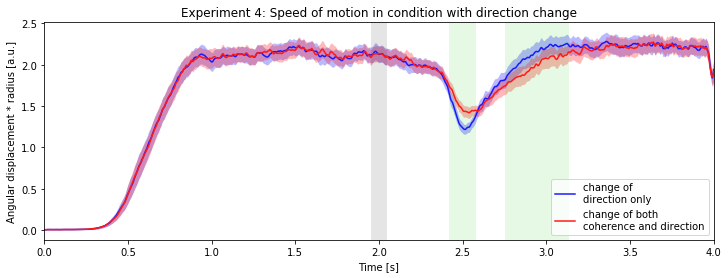

In [156]:
p = pickle_list[0]
conditions = [1,3]

stats_res = results_stats[p[:-6]]

colour1 = "#1919ff"
colour2 = "#ff1919"
sign = "#00cc00"

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)

for i in stats_res[1]:
    ax.axvspan(i[0], i[1], alpha=0.1, color=sign, linewidth=0)

ax.axvspan(time[blink_ix[0]], time[blink_ix[1]], alpha=0.1, color="black", linewidth=0)
                 
mean_val = mean[p][conditions[0]]
sem_val = sem[p][conditions[0]]
sem_low = mean_val - sem_val
sem_high = mean_val + sem_val
ax.plot(time, mean_val, color=colour1, label=labels[conditions[0]])
ax.fill_between(time, sem_low, sem_high, alpha=.3, color=colour1, linewidth=0)

mean_val = mean[p][conditions[1]]
sem_val = sem[p][conditions[1]]
sem_low = mean_val - sem_val
sem_high = mean_val + sem_val
ax.plot(time, mean_val, color=colour2, label=labels[conditions[1]])
ax.fill_between(time, sem_low, sem_high, alpha=.3, color=colour2, linewidth=0)

plt.legend(loc=4, fontsize="medium")

plt.xlabel("Time [s]")
plt.ylabel("Angular displacement * radius [a.u.]")
plt.title("Experiment 4: Speed of motion in condition with direction change")

plt.xlim((0,4));
plt.savefig(op.join(path_figs, "exp4_tr_ch.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp4_tr_ch.svg"), bbox_inches="tight")